In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from hpelm import ELM
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score


In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')


print(train.shape[0])
train.head()

22792


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,37,Private,140673,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,40,United-States,>50K
1,62,Private,35783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,60,United-States,<=50K
2,30,Private,190511,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
3,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
4,69,Self-emp-not-inc,170877,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,48,United-States,<=50K


    Q1. TASK 1:

In [3]:
data_types = train.dtypes

# Separate columns into categorical and numerical based on data types
categorical_columns = data_types[data_types == 'object'].index.tolist()
numerical_columns = data_types[data_types != 'object'].index.tolist()

print("Categorical columns:")
print(categorical_columns)

print("\nNumerical columns:")
print(numerical_columns)

Categorical columns:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

Numerical columns:
['age', 'fnlwgt', 'educational-num', 'hours-per-week']


    Q1. TASK2:

In [4]:
scaler = StandardScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])


In [5]:
test[numerical_columns] = scaler.transform(test[numerical_columns])


In [316]:
#train.head()

    Q2 TASK1:

In [6]:

# Convert 'income' to 0 and 1
train['income'] = train['income'].str.strip().replace({'>50K': 1, '<=50K': 0})

# Remove 'income' from categorical_columns
categorical_columns = [col for col in categorical_columns if col != 'income']

# Concatenate train and test for one-hot encoding
combined_data = pd.concat([train, test], axis=0, ignore_index=True)

# Perform one-hot encoding on the remaining categorical columns
categorical_encoded = pd.get_dummies(combined_data[categorical_columns], columns=categorical_columns)

# Concatenate the one-hot encoded columns with the rest of the data
combined_data_encoded = pd.concat([combined_data.drop(columns=categorical_columns), categorical_encoded], axis=1)

combined_data_encoded = combined_data_encoded.fillna(0)

# Identify columns to exclude from integer conversion
columns_to_exclude = numerical_columns

# Create a list of columns to convert to integers
columns_to_convert = [col for col in combined_data_encoded.columns if col not in columns_to_exclude]

# Convert selected columns to integers
combined_data_encoded[columns_to_convert] = combined_data_encoded[columns_to_convert].astype(int)
combined_data_encoded.head()

# Separate train and test after one-hot encoding
train_encoded = combined_data_encoded.iloc[:len(train)]
test_encoded = combined_data_encoded.iloc[len(train):]




In [318]:
#train_encoded.head()

In [319]:
#test_encoded.head()

In [7]:
X_train = train_encoded.drop('income', axis=1)
y_train = train_encoded['income']
#X_train.head()

    Q2 TASK2:

best parameters are:  LR:0.01, Reg:1e-05, Iter:500


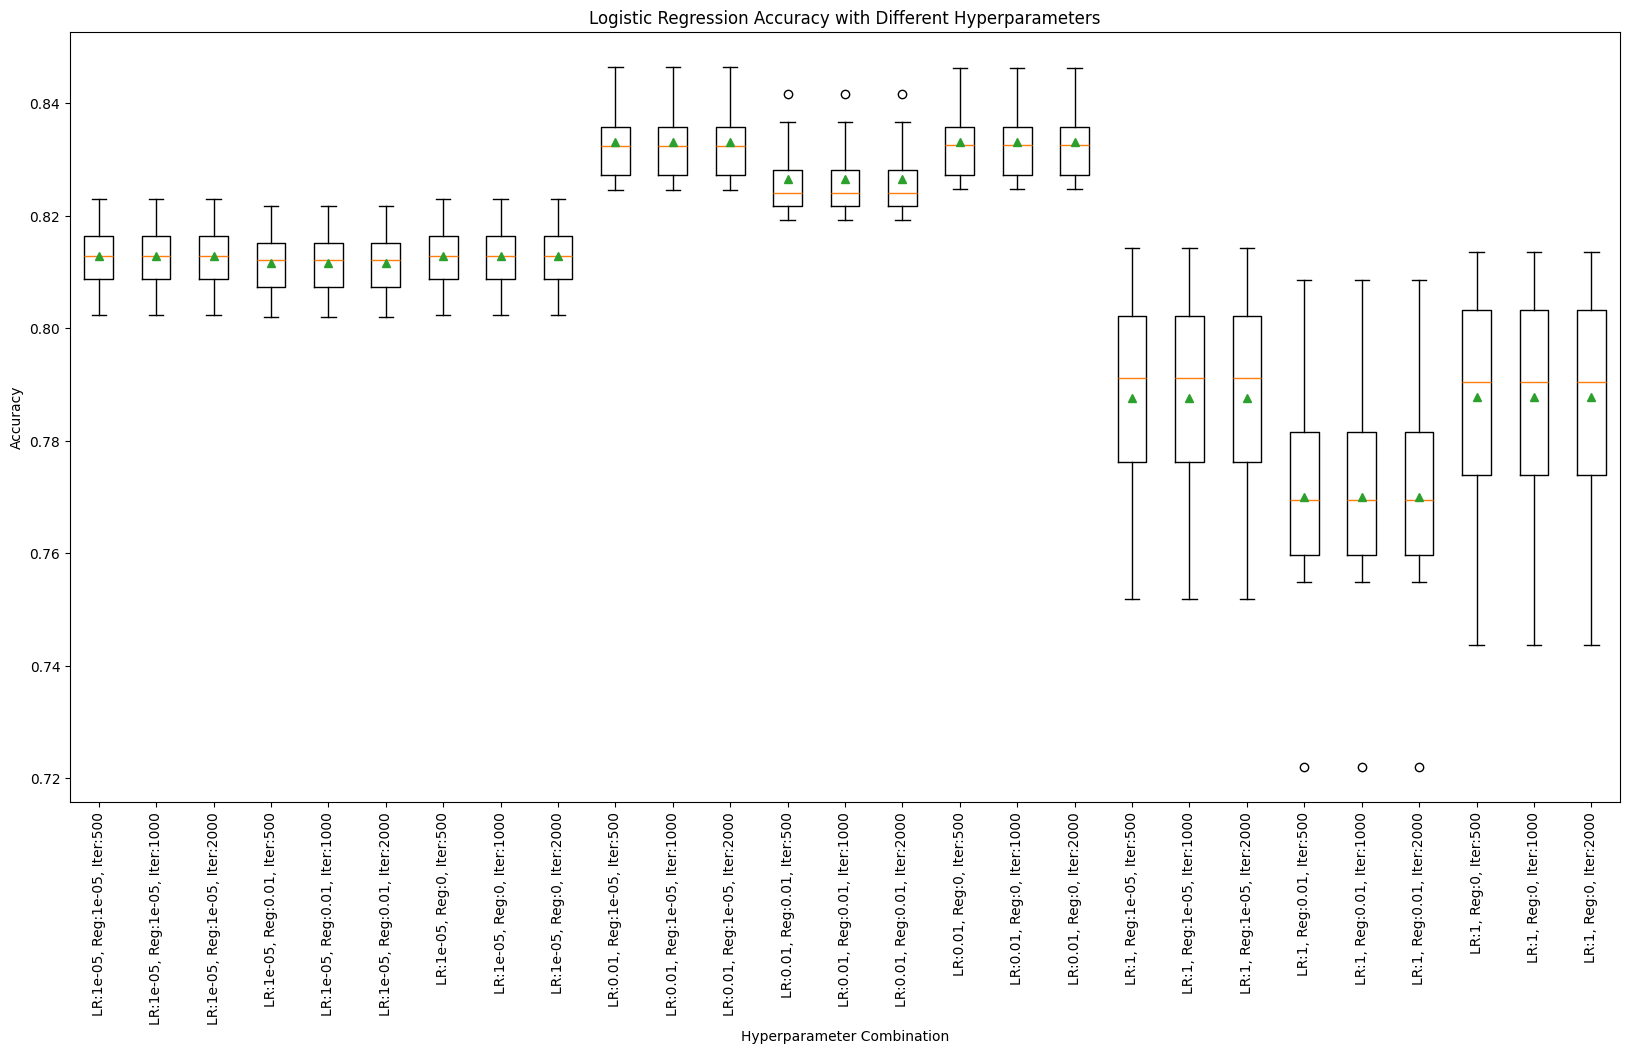

In [8]:
learning_rates = [0.00001, 0.01, 1]
regularization_terms = [0.00001, 0.01, 0]
max_iterations = [500, 1000, 2000]

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

best_model = None
best_score = -1
count = -1
best_count = -1

all_scores = []
hyperparam_combinations = []
best_model_scores = []

for learning_rate in learning_rates:
    for regularization in regularization_terms:
        for max_iter in max_iterations:
            count +=1
            model = SGDClassifier(loss='log_loss',
                                   penalty='l2', alpha=regularization,
                                  max_iter=max_iter, tol=1e-3, learning_rate='constant',
                                  eta0=learning_rate, random_state=1)
            
            # Evaluate the model using cross-validation
            scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
            all_scores.append(scores)
            hyperparam_combinations.append(f"LR:{learning_rate}, Reg:{regularization}, Iter:{max_iter}")
            
            # Check if this is the best score so far and update the best model
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_model = model
                best_count = count
                best_model_scores = scores
best_model.fit(X_train, y_train)
print("best parameters are: ",hyperparam_combinations[best_count])
# Plot the boxplot for each combination
fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(all_scores, labels=hyperparam_combinations, showmeans=True)
plt.title('Logistic Regression Accuracy with Different Hyperparameters')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


In [9]:
print(best_score)

0.8330117889759162


    Q2 TASK3:
the best model is for these parameters: 
    learning rate of 0.00001
    regularization rate of 0.00001
    iterations of 500

i tried different things but couldn't get the model better and get a better accuracy

In [10]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import SGDClassifier


sgd_classifier = SGDClassifier(loss='log_loss',  # Logistic Regression
                               learning_rate='invscaling',
                               eta0=0.9,  # Initial learning rate
                               alpha=0.0005,  # Regularization term
                               max_iter=5000,  # Number of iterations
                               #power_t=0.9,  # Exponent for inverse scaling
                               #class_weight='balanced',  # Automatically balance classes
                               random_state=42)



cv_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

accuracy_scores = cross_val_score(sgd_classifier, X_train, y_train, cv=cv_strategy, scoring='accuracy')

mean_accuracy = accuracy_scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')


Mean Accuracy: 0.8345


In [11]:
test_encoded = test_encoded.drop(columns=['income'])
test_encoded.head()

,age,fnlwgt,educational-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
22792,-0.339995,0.342663,1.140350,-0.034380,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22793,1.416589,1.622272,-0.416222,-0.845137,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22794,-0.486377,-1.352531,1.140350,-0.034380,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22795,-1.364669,-0.074319,-0.027079,-0.034380,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22796,-0.779141,-0.886941,1.140350,0.776377,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


    Q2 TASK4:

In [12]:
y_pred = best_model.predict(test_encoded)
print(y_pred)



[1 0 0 ... 0 1 0]


In [13]:
from numpy import savetxt
y_pred_labels = np.where(y_pred == 1, '>50K', '<=50K')

np.savetxt('prediction_lr.csv', y_pred_labels, delimiter=',', fmt='%s')


        Q3 TASK1:

In [15]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = train.drop('income', axis=1)
y_train = train['income']
# Separate data into numerical and categorical
X_numerical = X_train[numerical_columns].values
categorical_columns = [col for col in categorical_columns if col != 'income']
X_categorical = X_train[categorical_columns].values






best number of components is 4

In [16]:
X_train = train.drop('income', axis=1)
y_train = train['income']

In [17]:
X_test = test_encoded

numerics = ['age', 'fnlwgt', 'educational-num', 'hours-per-week']
# Get the names of categorical attributes
categoricals = [col for col in X_train.columns if col not in numerics]
#print("Categorical Attributes:")
#print(categoricals)

In [18]:
X_train = train_encoded.drop('income', axis=1)

X_test = test_encoded

In [19]:
aa = [col for col in X_train.columns if col not in numerics]
bb = [col for col in X_test.columns if col not in numerics]


In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB


# Filter numerical columns
X_train_numerical = X_train[numerics]
X_test_numerical = X_test[numerics]

# Filter categorical columns
X_train_categorical = X_train[aa]
X_test_categorical = X_test[bb]

print("Shapes of Numerical DataFrames:")
print("X_train_numerical:", X_train_numerical.shape)
print("X_test_numerical:", X_test_numerical.shape)

print("\nShapes of Categorical DataFrames:")
print("X_train_categorical:", X_train_categorical.shape)
print("X_test_categorical:", X_test_categorical.shape)



Shapes of Numerical DataFrames:
X_train_numerical: (22792, 4)
X_test_numerical: (9769, 4)

Shapes of Categorical DataFrames:
X_train_categorical: (22792, 102)
X_test_categorical: (9769, 102)


In [21]:
from sklearn.preprocessing import LabelEncoder


rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train_numerical, y_train)
gaussian_probas = gnb.predict_proba(X_train_numerical)

mnb = MultinomialNB()
mnb.fit(X_train_categorical, y_train)
multinomial_probas = mnb.predict_proba(X_train_categorical)

new_features = np.hstack((multinomial_probas, gaussian_probas))

new_gnb = GaussianNB()

scores = cross_val_score(new_gnb, new_features, y_train, cv=rkf, scoring='accuracy')

In [22]:
print(scores)

[0.81004606 0.81925861 0.80715226 0.82294866 0.82426503 0.82496161
 0.82496161 0.80912681 0.81197894 0.81241773]


array([0.84053521, 0.825839  , 0.83282141, 0.83084686, 0.83545415,
       0.82452292, 0.83176135, 0.84642387, 0.83589294, 0.82602018])

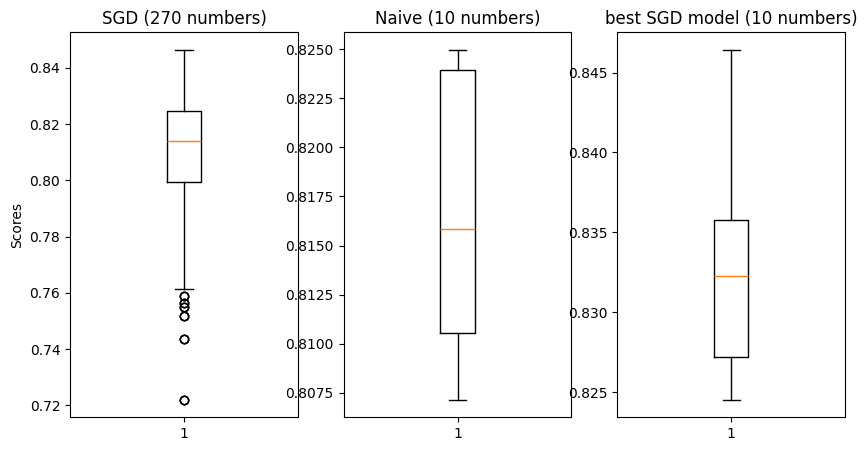

In [23]:
flattened_all_scores = np.hstack(all_scores)

fig, axes = plt.subplots(1, 3, figsize=(10,5))

axes[0].boxplot(flattened_all_scores)
axes[0].set_title('SGD (270 numbers)')
axes[0].set_ylabel('Scores')

axes[1].boxplot(scores)
axes[1].set_title('Naive (10 numbers)')

axes[2].boxplot(best_model_scores)
axes[2].set_title('best SGD model (10 numbers)')

best_model_scores

    Q3 TASK2:
logistic regression has done better than naive base

    Q3 TASK3:

In [24]:
X_test_gaussian_probas = gnb.predict_proba(X_test_numerical)
X_test_multinomial_probas = mnb.predict_proba(X_test_categorical)
X_test_new_features = np.hstack((X_test_multinomial_probas, X_test_gaussian_probas))




In [25]:
new_gnb.fit(new_features, y_train)  
y_pred_naive = new_gnb.predict(X_test_new_features) 


In [26]:
y_pred_naive = new_gnb.predict(X_test_new_features)

# Convert predictions to '>50K' or '<=50K'
y_pred_labels = np.where(y_pred_naive == 1, '>50K', '<=50K')

In [27]:
print(y_pred_labels)

['>50K' '<=50K' '<=50K' ... '<=50K' '>50K' '<=50K']


In [28]:

np.savetxt('prediction_b.csv', y_pred_labels, delimiter=',', fmt='%s')


    Q4:
یکی از ضعف‌های این مدل این است که فرض میکند ویژگی‌ها از هم مستقل هستند اما در داده‌های دنیای واقعی این‌طور نیست یعنی با هم همبستگی دارند

راه حلی برای این مشکل این است که از مدل های پیچیده‌تر که وابستگی ویژگی‌ها را در نظر می‌گیرند استفاده کنیم. مثل رگرسیون لاجیستیک یا رندوم فارست که این فرض را ندارند که ویژگی‌ها از هم مستقل‌اند. همچنین میتواند 
feature engineering
انجام داد تا مقدار وابستگی را کم کرد و سپس از مدل
naive 
استفاده کرد 